# Practical: $K$-means Clustering

Herman Kamper, 2020-2021. Licensed under [CC BY-SA 4.0](http://creativecommons.org/licenses/by-sa/4.0/).

## Preliminaries

In [7]:
%matplotlib inline
from scipy.spatial import distance
from sklearn import cluster, datasets, decomposition, manifold
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## 1. $K$-means clustering on Iris data

We will perform $K$-means on the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). When Edger Anderson collected this dataset, he know the species of each individual flower, and therefore labelled each data item accordingly. Here we will pretend that we do not have the labels, and see what type of structures we can discover directly from the data. The data is loaded below, with more details of the features given [here](https://scikit-learn.org/stable/datasets/index.html#iris-dataset).

In [8]:
# Load data
iris = datasets.load_iris()
X = iris["data"]  # sepal length, width, petal length, width
y = iris["target"]  # will not use the labels for clustering

### 1.1. Implementing $K$-means

Pseudocode for the $K$-means clustering algorithm is as follows:

1. Randomly assign each item $\mathbf{x}^{(n)}$ to one of the $K$ clusters.

2. repeat until cluster assignments stop changing:
    - for cluster $k = 1$ to $K$:  
      Calculate the cluster centroid $\boldsymbol{\mu}_k$ as the mean of all the items assigned to cluster $k$.
    - for item $n = 1$ to $N$:  
      Assign item $\mathbf{x}^{(n)}$ to the cluster with the closest centroid.

**Questions:**

- Plot the data with `petal length` on the $x$-axis and `petal width` on the $y$-axis. (Do not use the labels `y`, i.e. plot the data without indicating the different classes.)
- Implement the $K$-means algorithm using NumPy and SciPy. Although you only plotted two features above, you should use all four features for clustering. *Hint:* The `scipy.cdist` function might be useful.
- Cluster the Iris data into $K = 3$ clusters.
- Plot the data again, but now indicate each cluster (according to the $K$-mean's assignment) with a different color. Also indicate the cluster means.

In [9]:

# Answer: Add code and new cells here


### 1.2. Evaluate the clusters

When applying unsupervised learning (such as a clustering algorithm), we will by definition not use any labels. However, in some cases it might be possible to collect a small set of labels on which to evaluate the results from the algorithm. For clustering in particular there is a range of metrics which can then be used to measure the quality of the clusters.

One of these metrics is *purity*. It is calculated as follows. Every cluster is mapped to the most common class occuring in that cluster. We add up the number of items in each cluster belonging to the class that occurs most often. Then we divide by the total number of items. If we have $K$ clusters and $M$ different classes, we can write out the calculation of purity mathematically:
$$\begin{aligned}
    \textrm{Purity} &= \frac{1}{N} \sum_{k = 1}^K \left[ \max_{m = 1}^M \left( \textrm{# items in cluster $k$ from class $m$} \right) \right] \\
    &= \frac{1}{N} \sum_{k = 1}^K \left[ \max_{m = 1}^M \left(\sum_{i \in C_k} \mathbb{I}\left\{ y^{(i)} = m \right\} \right) \right]
\end{aligned}$$
where $\mathbb{I}\left\{\cdot\right\}$ is the indicator function, $C_k$ is the set of indices of items assigned to cluster $k$, and $y^{(i)}$ is the class label of item $\mathbf{x}^{(i)}$. 

**Questions:**
- Using the labels from the Iris dataset, calculate the purity of the resulting clusters from Section 1.1. *Hint:* The `Counter` class in the `collections` library (in normal Python) might be useful here.
- Go back to Section 1.1 and redo the clustering, but with a much larger $K$. *Note:* It might happen during the assignment step in the inner loop of the algorithm, that some clusters are not assigned any items. In these cases, it might be good to add an additional step where a random item is assigned to such clusters (this might also depend on your end application, but in this case it would be a good idea).
- What is the effect on the purity for large $K$? What happens with the purity when we use a very small $K$? Why?

In [10]:

# Answer: Add code and new cells here


**Optional question:** Above you used all four features to do clustering. You can go back (repeating both Sections 1.1 and 1.2) and observe the effect if clustering is only performed, for instance, on two of the features. You will see that which two features you choose will also impact performance.

Scikit-learn also has a `KMeans` class in `sklearn.cluster`, which you can use from this point onwards. The scikit-learn documentation also has a [very thorough description](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) of purity and other performance metrics, as well as a [useful overview](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) of several clustering methods applied to several simulated datasets.

## 2. Image compression with $K$-means

In [ ]:
# If you haven't downloaded the data already with the notebook: Download data
import urllib
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/kamperh/data414/main/practicals/clustering/baby_yoda.png",
    "baby_yoda.png"
    )

An intersting application of $K$-means is for compression. Although  there are many more advanced algorithms that you would use in practice, we use $K$-means for image compression in this section.

The code below loads and displays an image in Python:

(-0.5, 255.5, 255.5, -0.5)

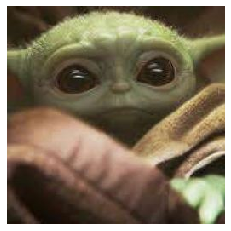

In [11]:
image = mpl.image.imread("baby_yoda.png")
plt.imshow(image)
plt.axis("off")

In a 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue (RGB) intensity values. The image above contains thousands of different colours. Here we will compress this image by only using 16 colours.

The code below reshapes the image data to an $N \times 3$ matrix. It also scales the values to the range of $[0, 1]$ by dividing by 255.

In [12]:
# Reshape and rescale image
X = image.reshape(-1, 3)
X /= 255
print("Image shape:", X.shape)

Image shape: (65536, 3)


Use the `KMeans` scikitlearn class in this section. Treating each of the pixels in `X` as a 3-dimensional data item, do the following.

**Questions:**
- Find the $K = 16$ colours that best clusters the pixels in the 3-dimensional space.
- Map the original image to a new image, where every pixel is represented by the cluster mean to which that pixel was assigned.
- Plot the new image.
- Change the value of $K$ and repeat the above questions. What do you observe?

*Hints:*  The cluster means can be accessed through the `cluster_centers_` attribute of a `KMeans` object while the cluster assignments can be accessed through `labels_`. See the [full documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for more details. You can also use `X_mapped.reshape(image.shape)` to reshape a projection back to the original image dimensions.

In [13]:

# Answer: Add code and new cells here


Note that when using 16 clusters, you have dramatically reduced the number of bits required for storing the image. The original image required 24 bits for each of the $256 \times 256$ pixels, resulting in a total of $1\,572\,864$ bits. The new representation requires some overhead to store the $K = 16$ colours, each requiring 24 bits. But the image itself only requires 4 bits ($2^4 = 16$ clusters) for each pixel location. The $K$-means compressed image can therefore be stored using $16 \times 24 + 256 \times 256 \times 4 = 262\,528$ bits, compressing the original by a factor of about 6.

## Acknowledgements

- Sections 2 is based on an example from the [Coursera Machine Learning](https://www.coursera.org/learn/machine-learning) course.